In [131]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram
from scipy.signal import signaltools
import scipy.spatial.distance as sp_distance
import seaborn as sns
import pandas as pd
from numpy.fft import fft, rfft
%matplotlib inline

In [2]:
# load rsrm results based on cluster-selected features

srm_pickle_path = '/home/homeGlobal/oli/somato/scratch/srm_roi/rsrm.p'
with open(srm_pickle_path, 'rb') as f:
    srm = pickle.load(f)

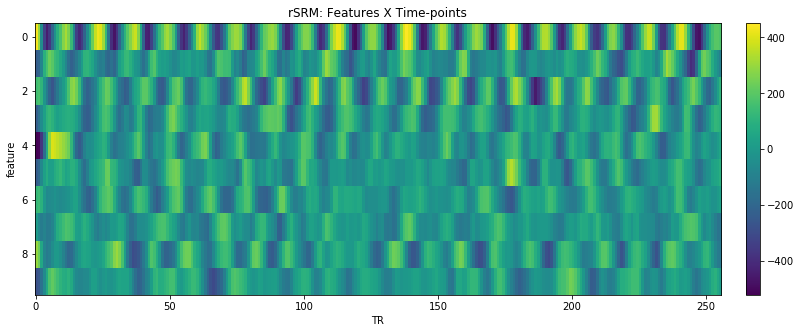

In [11]:
# plot shared responses as heatmaps

plt.figure(figsize=(15, 5))
plt.title('rSRM: Features X Time-points')
plt.xlabel('TR')
plt.ylabel('feature')
plt.imshow(srm.r_, cmap='viridis', aspect='auto')
plt.colorbar(orientation='vertical', pad=.03)  #fraction=0.03, 

In [25]:
 # calculate power spectrum of components
    
frequencies, powerdensities = [], []
for comp in range(len(srm.r_)):
    freq, power = periodogram(srm.r_[comp,:], fs=.5)
    frequencies.append(freq)
    powerdensities.append(power)
frequencies = np.array(frequencies)
powerdensities = np.array(powerdensities)

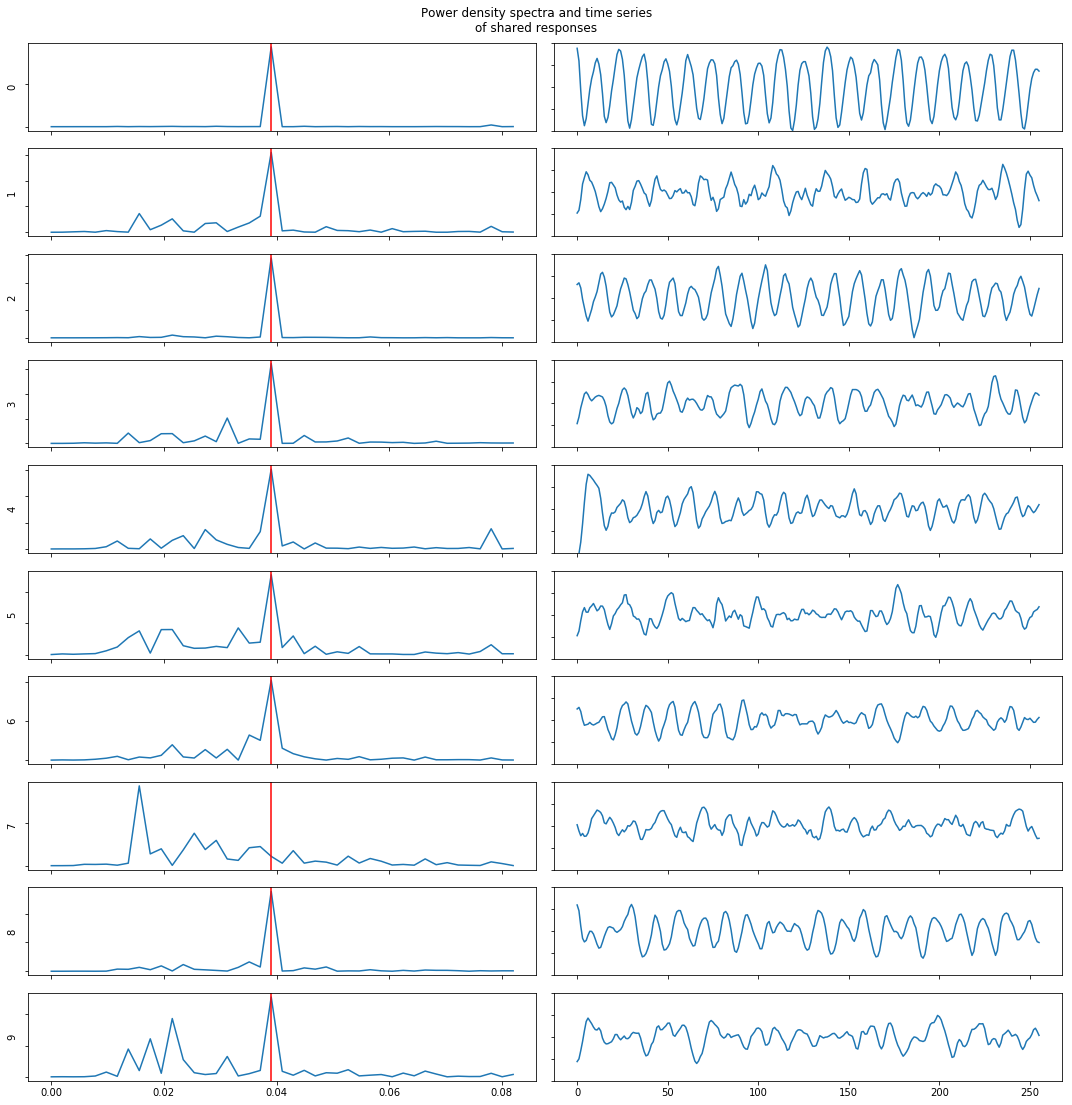

In [147]:
# plot power densities of components


# only show lower half of frequency spectrum to avoid clutter
cut_to_length = int(len(powerdensities[0,:]) / 3)
rowheight = 1.5

fig, axs = plt.subplots(nrows=len(srm.r_), ncols=2, figsize=(15,len(srm.r_)*rowheight))
fig.suptitle('Power density spectra and time series\nof shared responses', y=1.02)

for comp_idx, axis in zip(range(len(srm.r_)), axs):
    # plot power densities
    sns.lineplot(y=powerdensities[comp_idx,:cut_to_length],
                 x=frequencies[comp_idx,:cut_to_length],
                 ax=axis[0])
    # mark stimulation frequency with red line
    axis[0].axvline(0.0390625, color='red')  
    axis[0].set_ylabel('%i' % comp_idx)
    # plot time course
    sns.lineplot(y=srm.r_[comp_idx],
                 x=range(len(srm.r_[comp_idx])),
                 ax=axis[1],)
    axis[1].set_ylim(-500,500)  # give all time courses same y-limits

    for col in range(2):
        axis[col].set_yticklabels([])
        if comp_idx != len(srm.r_)-1:
            axis[col].set_xticklabels([])

    
plt.tight_layout()